In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline

from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

from qiskit.compiler import transpile,assemble
from qiskit.tools.jupyter import *

{'010000': 100}


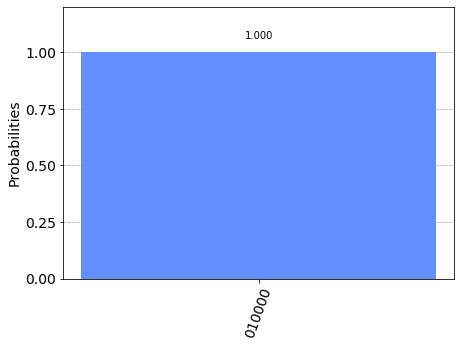

In [2]:
qi=QuantumRegister(10)
qb=QuantumRegister(3)
qo=QuantumRegister(5)
s=QuantumRegister(1)
c=ClassicalRegister(6)

circuit=QuantumCircuit(qi,qb,qo,s,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)

def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)

def or_4(qc,q0,q1,q2,q3,b1,b2,q4):
    or_3(qc,q0,q1,q2,b1,b2)
    fun_or (qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)
    
def or_5(qc,q0,q1,q2,q3,q4,b1,b2,b3,q5):
    or_4(qc,q0,q1,q2,q3,b1,b2,b3)
    fun_or (qc,b3,q4,q5)
    qc.reset(b1)
    qc.reset(b2)
    qc.reset(b3)
    
#input

circuit.x(qi[6])

#circuit

or_5(circuit,qi[0],qi[6],qi[7],qi[8],qi[9],qb[0],qb[1],qb[2],qo[4])
or_5(circuit,qi[0],qi[1],qi[7],qi[8],qi[9],qb[0],qb[1],qb[2],qo[3])
or_5(circuit,qi[0],qi[1],qi[2],qi[8],qi[9],qb[0],qb[1],qb[2],qo[2])
or_5(circuit,qi[0],qi[1],qi[2],qi[3],qi[8],qb[0],qb[1],qb[2],qo[1])
or_5(circuit,qi[0],qi[1],qi[2],qi[3],qi[4],qb[0],qb[1],qb[2],qo[0])

#measurement

circuit.measure(s[0],c[5])
circuit.measure(qo[4],c[4])          
circuit.measure(qo[3],c[3])
circuit.measure(qo[2],c[2])
circuit.measure(qo[1],c[1])
circuit.measure(qo[0],c[0])

#execution

job = execute(circuit,simulator,shots=100)
result=job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

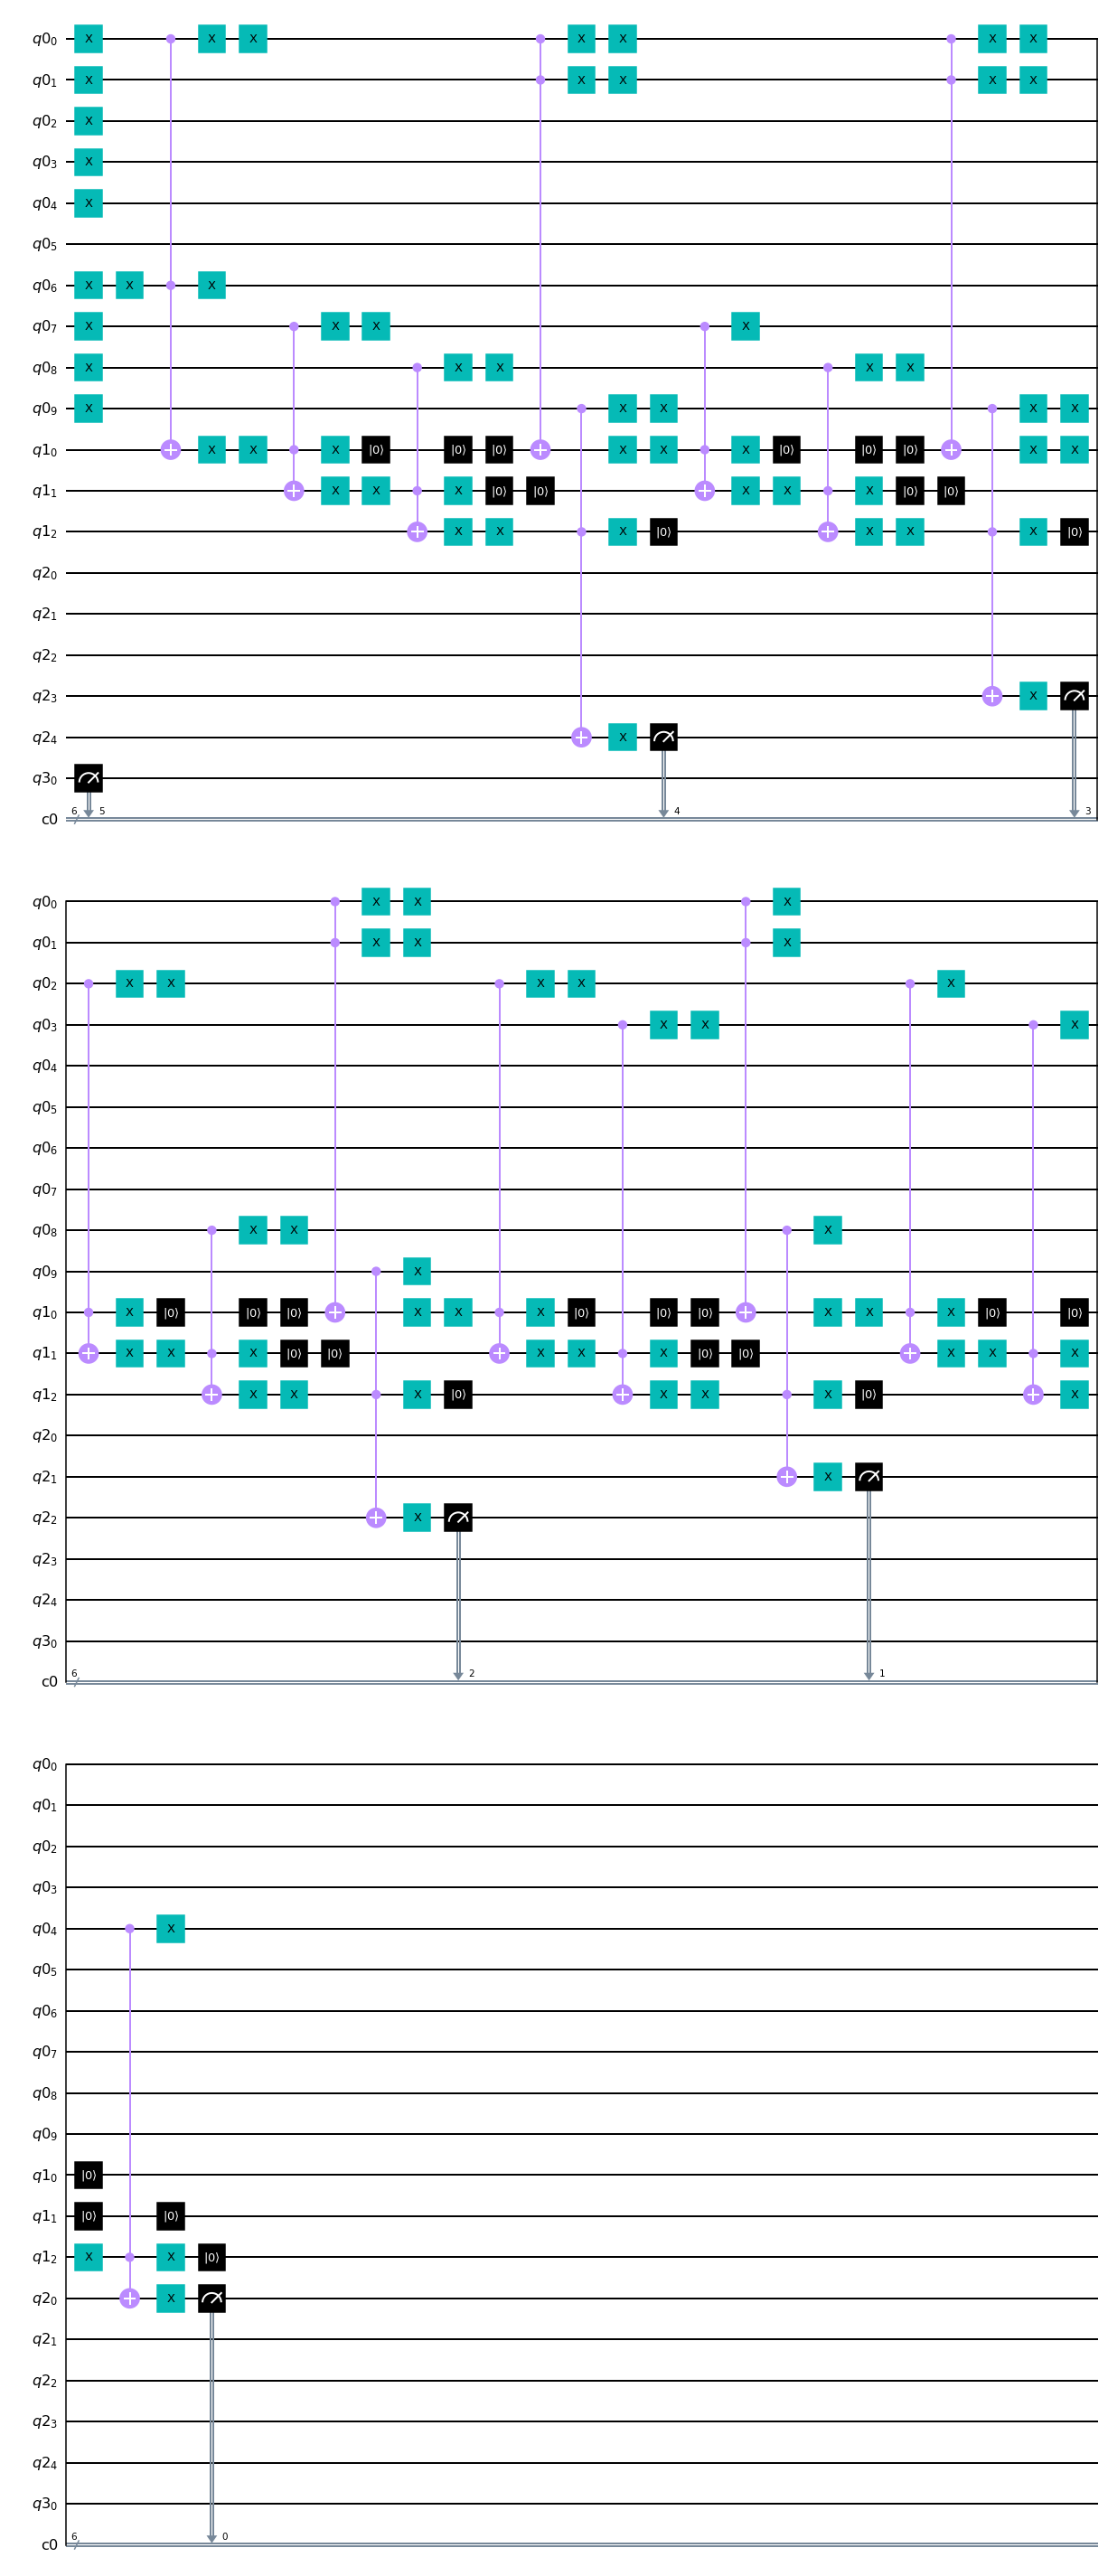

In [3]:
circuit.draw(output='mpl')